# Лабораторная работа 1

In [3]:
import pandas as pd
import numpy as np

df = pd.read_csv('teen_phone_addiction_dataset.csv')

usage = df['Time_on_Gaming']

mean_val = usage.mean()
var_val = usage.var()
mode_val = usage.mode().iloc[0]
median_val = usage.median()
q25, q50, q75 = usage.quantile(0.25), usage.quantile(0.5), usage.quantile(0.75)
kurtosis_val = usage.kurt()   
skewness_val = usage.skew()
iqr_val = q75 - q25

print(f"Mean (Среднее): {mean_val:.3f}")
print(f"Variance (Дисперсия): {var_val:.3f}")
print(f"Mode (Мода): {mode_val:.1f}")
print(f"Median (Медиана): {median_val:.3f}")
print(f"0.25-quantile: {q25:.3f}")
print(f"0.50-quantile: {q50:.3f}")
print(f"0.75-quantile: {q75:.3f}")
print(f"Kurtosis (Эксцесс): {kurtosis_val:.3f}")
print(f"Skewness (Асимметрия): {skewness_val:.3f}")
print(f"IQR (Интерквартильный размах): {iqr_val:.3f}")

Mean (Среднее): 1.525
Variance (Дисперсия): 0.870
Mode (Мода): 0.0
Median (Медиана): 1.500
0.25-quantile: 0.800
0.50-quantile: 1.500
0.75-quantile: 2.200
Kurtosis (Эксцесс): -0.498
Skewness (Асимметрия): 0.259
IQR (Интерквартильный размах): 1.400


In [14]:
import numpy as np
from math import isinf
from scipy.stats import chi2, norm

mu = usage.mean()
sigma = usage.std(ddof=0)

quantiles = norm.ppf([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9], loc=mu, scale=sigma)
quantiles = quantiles.tolist()

edges = [float('-inf')] + quantiles + [float('inf')]

observed = []
for i in range(len(edges)-1):
    if isinf(edges[i]):
        count = (usage <= edges[i+1]).sum()
    elif isinf(edges[i+1]):
        count = (usage > edges[i]).sum()
    else:
        count = ((usage > edges[i]) & (usage <= edges[i+1])).sum()
    observed.append(count)

expected = [len(usage)*0.1] * 10

chi2_stat = sum(((obs - exp)**2)/exp for obs, exp in zip(observed, expected))

dof = 7

chi2_crit = chi2.ppf(0.95, dof)

p_val = 1 - chi2.cdf(chi2_stat, dof)

print("χ² statistic =", round(chi2_stat, 2))
print("Degrees of freedom =", dof)
print("Critical χ²(0.95) =", round(chi2_crit, 2))
print("p-value =", round(p_val, 6))
print("Observed frequencies:", observed)

χ² statistic = 62.08
Degrees of freedom = 7
Critical χ²(0.95) = 14.07
p-value = 0.0
Observed frequencies: [np.int64(378), np.int64(304), np.int64(294), np.int64(223), np.int64(362), np.int64(271), np.int64(305), np.int64(275), np.int64(270), np.int64(318)]


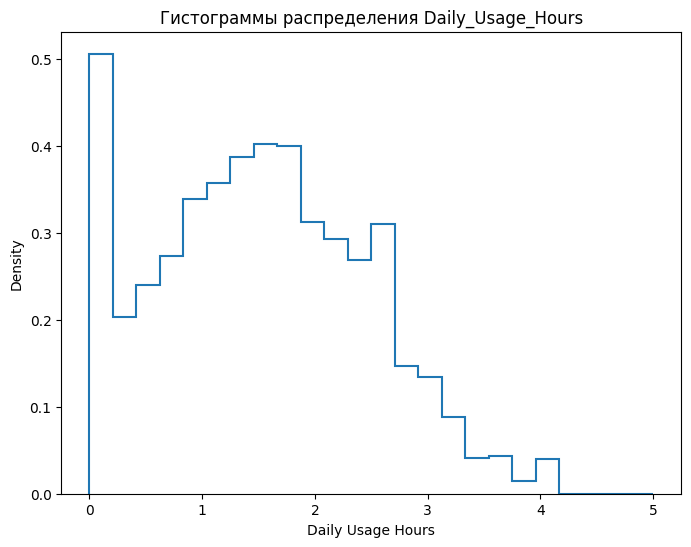

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
bins = np.linspace(0, 5, 25)
data_g = df['Time_on_Gaming']
plt.hist(data_g, bins=bins, density=True, histtype='step', linewidth=1.5)
plt.xlabel("Daily Usage Hours")
plt.ylabel("Density")
plt.title("Гистограммы распределения Daily_Usage_Hours")
plt.show()

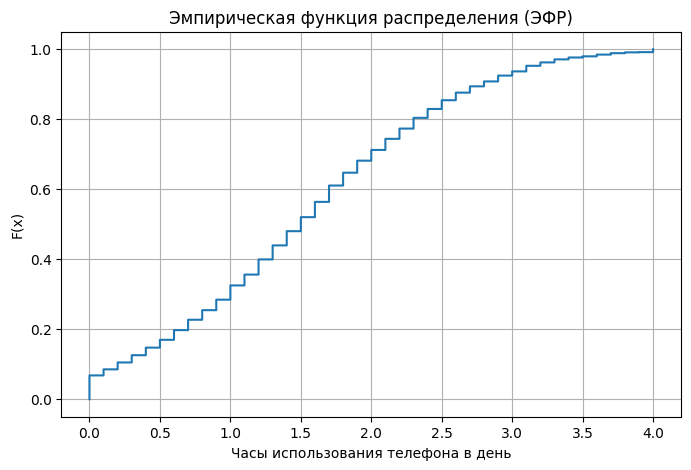

In [6]:
x_sorted = np.sort(data_g)
y = np.arange(1, len(x_sorted) + 1) / len(x_sorted)

plt.figure(figsize=(8, 5))
plt.step(x_sorted, y, where='post')
plt.title('Эмпирическая функция распределения (ЭФР)')
plt.xlabel('Часы использования телефона в день')
plt.ylabel('F(x)')
plt.grid(True)
plt.show()

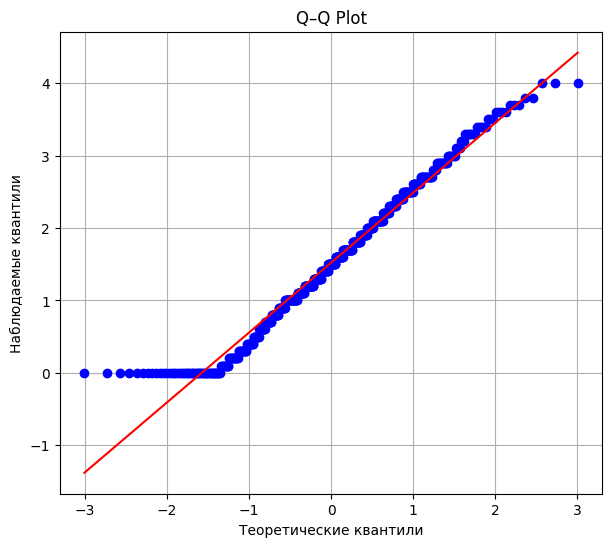

In [19]:
from scipy import stats

plt.figure(figsize=(7, 6))
stats.probplot(data_g, dist="norm", plot=plt)
plt.title('Q–Q Plot')
plt.xlabel('Теоретические квантили')
plt.ylabel('Наблюдаемые квантили')
plt.grid(True)
plt.show()

### Статистика после удаления выбросов

In [13]:
upper_fence = q75 + iqr_val
usage_proc = usage[usage <= upper_fence]

mean_proc = usage_proc.mean()
mode_val_proc = usage.mode().iloc[0]
median_proc = usage_proc.median()
var_proc = usage_proc.var()
skew_proc = usage_proc.skew()
kurt_proc = usage_proc.kurt()
print(f"Наблюдений после удаления выбросов: {len(usage_proc)}")
print(f"Новое среднее: {mean_proc:.3f}, медиана: {median_proc:.3f}")
print(f"Новая дисперсия: {var_proc:.3f}")
print(f"Новая мода: {mode_val_proc:.3f}")
print(f"Асимметрия: {skew_proc:.3f}, эксцесс: {kurt_proc:.3f}")

Наблюдений после удаления выбросов: 2954
Новое среднее: 1.488, медиана: 1.500
Новая дисперсия: 0.795
Новая мода: 0.000
Асимметрия: 0.133, эксцесс: -0.728


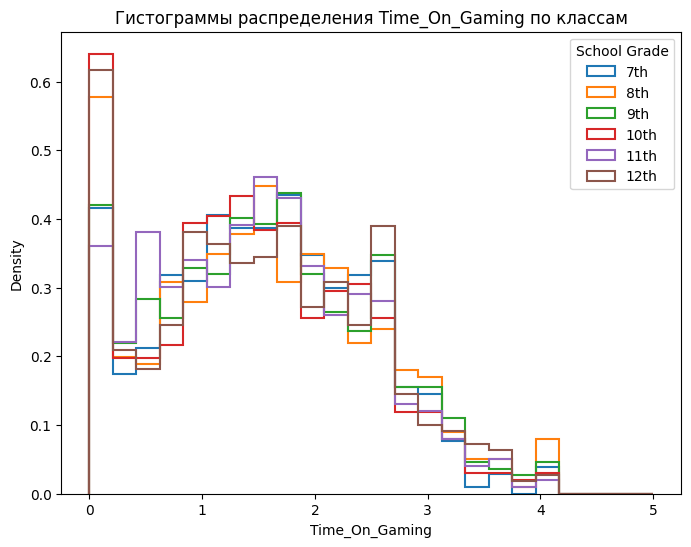

In [18]:
import matplotlib.pyplot as plt

grades = ['7th','8th','9th','10th','11th','12th']
plt.figure(figsize=(8,6))
bins = np.linspace(0, 5, 25)
for grade in grades:
    data_g = df[df['School_Grade'] == grade]['Time_on_Gaming']
    plt.hist(data_g, bins=bins, density=True, histtype='step', linewidth=1.5, label=grade)
plt.xlabel("Time_On_Gaming")
plt.ylabel("Density")
plt.title("Гистограммы распределения Time_On_Gaming по классам")
plt.legend(title="School Grade")
plt.show()

In [11]:
group_stats = df.groupby('School_Grade')['Time_on_Gaming'].agg(['mean','var'])
print(group_stats)

                  mean       var
School_Grade                    
10th          1.453183  0.861384
11th          1.512317  0.787609
12th          1.520227  0.943851
7th           1.554125  0.776682
8th           1.538589  0.964953
9th           1.569392  0.879880
